<a href="https://colab.research.google.com/github/ishikaahuja/AIML/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/NN Project Data - Signal.csv")

In [ ]:
print(df.head())

   Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           

In [ ]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:

missing_percentage = df.isnull().mean() * 100

missing_info = pd.DataFrame({
    'Attribute': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

print(missing_info)


          Attribute  Missing Percentage
0       Parameter 1                 0.0
1       Parameter 2                 0.0
2       Parameter 3                 0.0
3       Parameter 4                 0.0
4       Parameter 5                 0.0
5       Parameter 6                 0.0
6       Parameter 7                 0.0
7       Parameter 8                 0.0
8       Parameter 9                 0.0
9      Parameter 10                 0.0
10     Parameter 11                 0.0
11  Signal_Strength                 0.0


In [ ]:
df.replace(0, np.nan, inplace=True)
missing_percentage = df.isnull().mean() * 100

missing_info = pd.DataFrame({
    'Attribute': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

print(missing_info)

df.replace(np.nan, 0, inplace=True)

          Attribute  Missing Percentage
0       Parameter 1            0.000000
1       Parameter 2            0.000000
2       Parameter 3            8.255159
3       Parameter 4            0.000000
4       Parameter 5            0.000000
5       Parameter 6            0.000000
6       Parameter 7            0.000000
7       Parameter 8            0.000000
8       Parameter 9            0.000000
9      Parameter 10            0.000000
10     Parameter 11            0.000000
11  Signal_Strength            0.000000


In [ ]:

X = df.drop('Signal_Strength', axis=1)
y = df['Signal_Strength']

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to one-hot encoding
y_one_hot = to_categorical(y_encoded)


X_train, X_test, y_train, y_test = train_test_split(X,y_one_hot, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1119, 11) (1119, 6)
Test set shape: (480, 11) (480, 6)


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


Epoch 1/10
35/35 [==============================] - 2s 14ms/step - loss: 1.4336 - accuracy: 0.4629 - val_loss: 1.2236 - val_accuracy: 0.4875
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: 1.1192 - accuracy: 0.5612 - val_loss: 1.0636 - val_accuracy: 0.5667
Epoch 3/10
35/35 [==============================] - 0s 4ms/step - loss: 1.0315 - accuracy: 0.6068 - val_loss: 1.0274 - val_accuracy: 0.5479
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.9961 - accuracy: 0.6113 - val_loss: 1.0049 - val_accuracy: 0.5604
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.9762 - accuracy: 0.6229 - val_loss: 0.9925 - val_accuracy: 0.5562
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 0.9570 - accuracy: 0.6229 - val_loss: 0.9786 - val_accuracy: 0.5583
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.9458 - accuracy: 0.6318 - val_loss: 0.9659 - val_accuracy: 0.5833
Epoch 8/10
35/35 [=

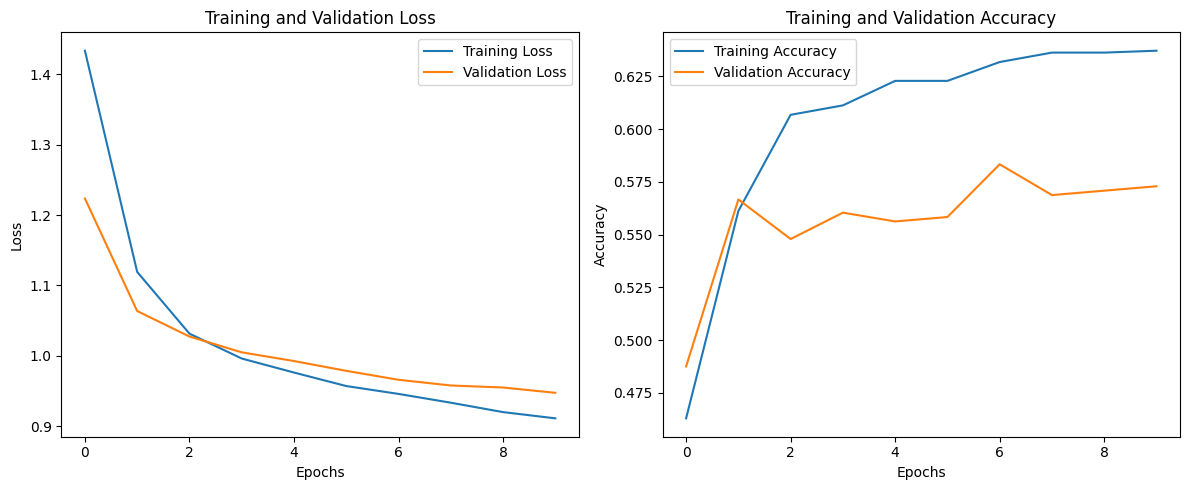

15/15 [==============================] - 0s 2ms/step
Accuracy on the test set: 57.29%


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')  # Use 'softmax' for multi-class classification
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

## Inference:

Decreasing Loss: The training loss decreases over epochs, indicating that the model is learning from the training data.

Validation Loss Trend: The validation loss also decreases initially, but it starts to stabilize or slightly increase after a certain number of epochs. This could indicate that the model might be overfitting the training data.

Increasing Accuracy: The training accuracy increases over epochs, suggesting that the model is learning to classify the training data better.

Validation Accuracy Trend: The validation accuracy increases initially but might plateau or exhibit fluctuations in later epochs. If the validation accuracy is significantly lower than the training accuracy, it might suggest overfitting.





### we try downsampling to tackle overfitting

In [ ]:
# Assuming 'df' is your DataFrame
value_counts = df['Signal_Strength'].value_counts()

# Count occurrences of 5 and 6
count_5 = value_counts.get(5, 0)
count_6 = value_counts.get(6, 0)

print(f"Number of occurrences of 5: {count_5}")
print(f"Number of occurrences of 6: {count_6}")


Number of occurrences of 5: 681
Number of occurrences of 6: 638


In [ ]:
from sklearn.utils import resample

df_majority = df[df['Signal_Strength'] == 5]
df_minority = df[df['Signal_Strength'] == 6]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

X_downsampled = df_downsampled.drop('Signal_Strength', axis=1)
y_downsampled = df_downsampled['Signal_Strength']

y_downsampled_encoded = label_encoder.fit_transform(y_downsampled)

y_downsampled_one_hot = to_categorical(y_downsampled_encoded)

X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(
    X_downsampled, y_downsampled_one_hot, test_size=0.3, random_state=42
)

scaler_downsampled = StandardScaler()
X_train_downsampled = scaler_downsampled.fit_transform(X_train_downsampled)
X_test_downsampled = scaler_downsampled.transform(X_test_downsampled)



Epoch 1/10
28/28 [==============================] - 1s 9ms/step - loss: 0.6614 - accuracy: 0.6249 - val_loss: 0.6174 - val_accuracy: 0.6841
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.7010 - val_loss: 0.5904 - val_accuracy: 0.6945
Epoch 3/10
28/28 [==============================] - 0s 4ms/step - loss: 0.5604 - accuracy: 0.7100 - val_loss: 0.5881 - val_accuracy: 0.6919
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7122 - val_loss: 0.5770 - val_accuracy: 0.7102
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7290 - val_loss: 0.5732 - val_accuracy: 0.7102
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5312 - accuracy: 0.7324 - val_loss: 0.5720 - val_accuracy: 0.7023
Epoch 7/10
28/28 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.7357 - val_loss: 0.5697 - val_accuracy: 0.7076
Epoch 8/10
28/28 [==

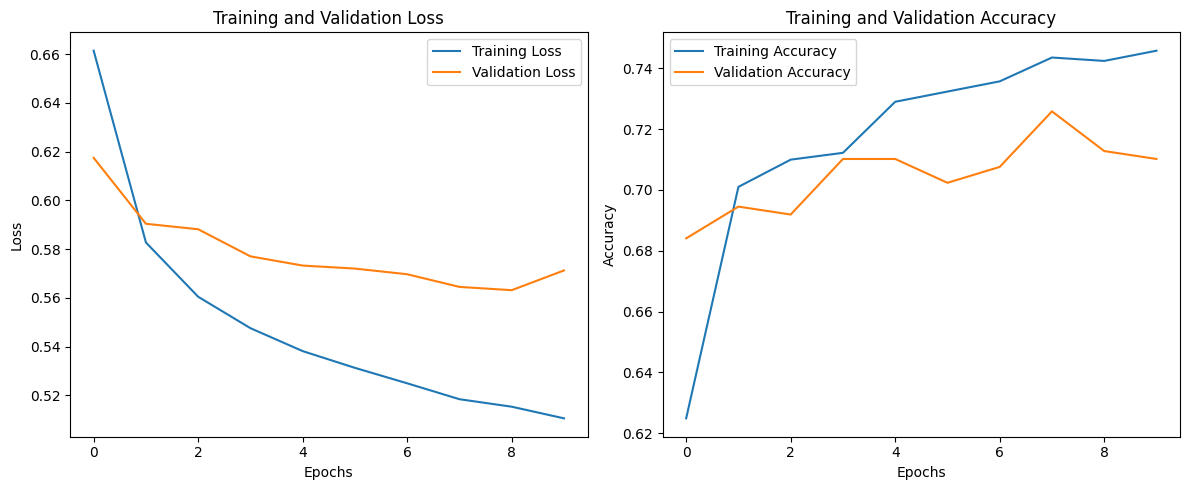

12/12 [==============================] - 0s 2ms/step
Accuracy on the test set: 71.02%


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Use 'softmax' for multi-class classification
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_downsampled, y_train_downsampled, epochs=10, batch_size=32, validation_data=(X_test_downsampled, y_test_downsampled))
# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_downsampled)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_downsampled, axis=1), y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Training Loss and Validation Loss:

The training loss decreases steadily over epochs, indicating that the model is learning from the training data.

The validation loss also shows a decreasing trend, which is a positive sign as it suggests that the model is not overfitting to the training data.

Training Accuracy and Validation Accuracy:

The training accuracy increases over epochs, indicating that the model is improving its ability to correctly classify examples from the training set.

The validation accuracy also increases, suggesting that the model is generalizing well to unseen data.

Comparing Training and Validation Metrics:

The training and validation metrics follow similar trends, indicating that the model is not overfitting.

If there were a significant gap between the training and validation metrics, it might suggest overfitting, but in this case, the trends are consistent.


Loss Values:

The loss values (both training and validation) are decreasing, which is expected during the training process. The model is successfully minimizing the loss function.


In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from tensorflow.python.keras.models import load_model

model_filename = '/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5'
from keras.applications.vgg16 import VGG16
model = VGG16(weights = None)
f = h5py.File(model_filename, 'r')



<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [16]:
f.keys()

ValuesViewHDF5(<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>)


In [18]:
X_train = f['X_train'][:]
X_test = f['X_test'][:]
y_train = f['y_train'][:]
y_test = f['y_test'][:]

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("X and y are in sync.")
else:
    print("X and y are not in sync.")

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)
X and y are in sync.


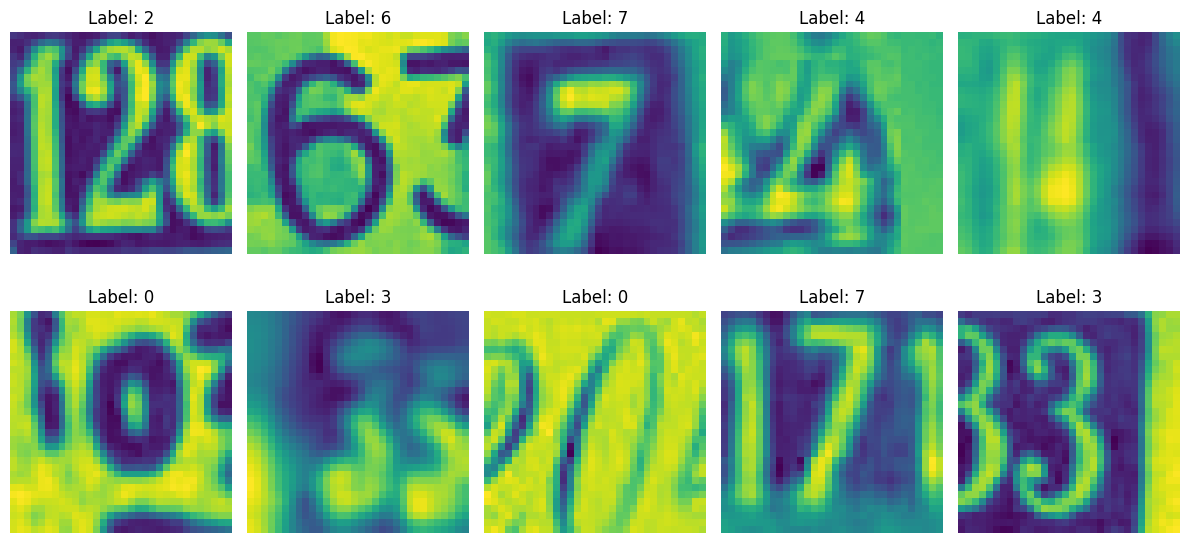

In [20]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_train[i])
    ax.set_title("Label: {}".format(y_train[i]))
    ax.axis('off')

plt.tight_layout()
plt.show()


In [24]:
print("Original shape of images:", X_train.shape)

Original shape of images: (42000, 32, 32)


In [25]:
import numpy as np
new_height = 32
new_width = 32
num_channels = 1


new_shape = (new_height, new_width, num_channels)

X_train_reshaped = np.array([np.reshape(image, new_shape) for image in X_train])

X_train = X_train_reshaped


In [26]:
X_train_normalized = X_train / 255.0

In [27]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()

y_train_reshaped = y_train.reshape(-1, 1)

y_train_encoded = encoder.fit_transform(y_train_reshaped)

y_train_encoded = y_train_encoded.toarray()


In [28]:
num_classes = len(np.unique(y_train))

print("Total number of classes in the dataset:", num_classes)

Total number of classes in the dataset: 10


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 140106 (547.29 KB)
Trainable params: 140106 (547.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:

num_epochs = 10
batch_size = 32

# Train the model
history = model.fit(X_train_normalized, y_train_encoded, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
1050/1050 [==============================] - 7s 4ms/step - loss: 2.3081 - accuracy: 0.1066 - val_loss: 2.2674 - val_accuracy: 0.1231
Epoch 2/10
1050/1050 [==============================] - 12s 11ms/step - loss: 1.9967 - accuracy: 0.2808 - val_loss: 1.7245 - val_accuracy: 0.4318
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 1.5611 - accuracy: 0.4740 - val_loss: 1.4360 - val_accuracy: 0.5227
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 1.3924 - accuracy: 0.5314 - val_loss: 1.3823 - val_accuracy: 0.5293
Epoch 5/10
1050/1050 [==============================] - 7s 6ms/step - loss: 1.3454 - accuracy: 0.5476 - val_loss: 1.3428 - val_accuracy: 0.5464
Epoch 6/10
1050/1050 [==============================] - 5s 4ms/step - loss: 1.3197 - accuracy: 0.5580 - val_loss: 1.3471 - val_accuracy: 0.5490
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 1.2961 - accuracy: 0.5693 - val_loss: 1.2941 - val_accurac

In [31]:
X_test_reshaped = np.array([np.reshape(image, new_shape) for image in X_test])

X_test = X_test_reshaped

In [32]:
X_test_normalized = X_test / 255.0

In [33]:
y_test_reshaped = y_test.reshape(-1, 1)

y_test_encoded = encoder.fit_transform(y_test_reshaped)

y_test_encoded = y_test_encoded.toarray()

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

loss, accuracy = model.evaluate(X_test_normalized, y_test_encoded)

y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_classes, average='weighted')
recall = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_classes, average='weighted')
f1 = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_classes, average='weighted')

print("Evaluation results:")
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


563/563 [==============================] - 1s 2ms/step
Evaluation results:
Loss: 1.2330491542816162
Accuracy: 0.5963333249092102
Precision: 0.5985542076851612
Recall: 0.5963333333333334
F1-score: 0.5926975482727442


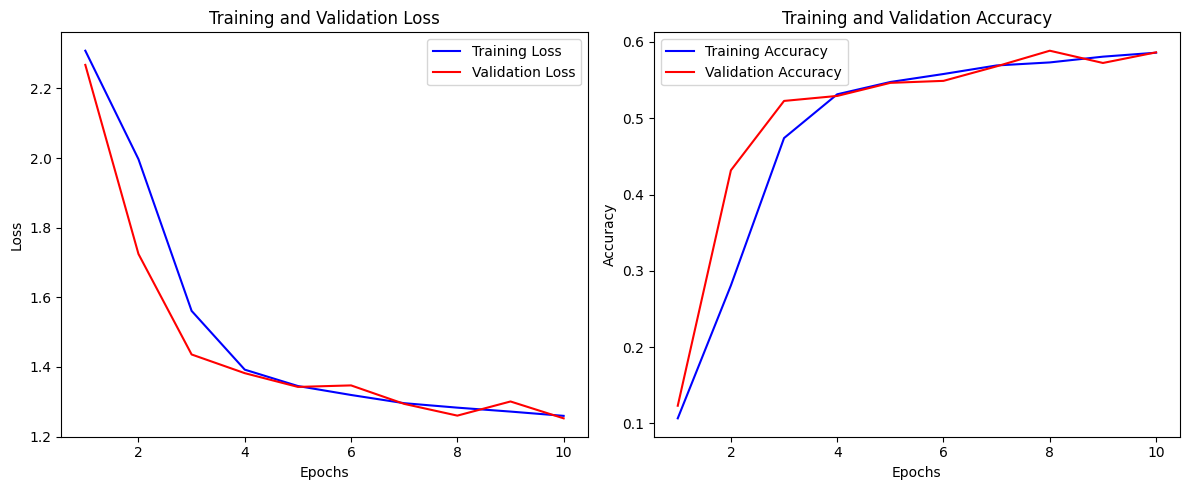

In [35]:
import matplotlib.pyplot as plt

# Extracting training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy vs epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


The training loss decreases with each epoch, indicating that the model is learning from the training data.

The validation loss also decreases initially but starts to level off or even increase after a certain number of epochs, suggesting possible overfitting.

The training accuracy improves over epochs, indicating that the model is fitting the training data better.

The validation accuracy follows a similar trend to the training accuracy but may plateau or decrease after a certain number of epochs, indicating overfitting.
